In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#!pip install hmmlearn
from hmmlearn import hmm
from hmmlearn import hmm
import seaborn as sns
import tensorflow as tf
from keras.layers import Input, Dense, BatchNormalization
from tensorflow import keras
from tensorflow.keras import Input, Model
#!pip install tensorflow
#!pip install keras
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Layer,Dropout
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
%matplotlib inline


In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Dataset using mount**

In [174]:
Bank_Data = pd.read_csv('/content/UniversalBank.csv',delimiter=',')
print(Bank_Data)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

**Shift Personal Loan to the last column**

In [175]:
shiftPos = Bank_Data.pop("Personal Loan")
Bank_Data.insert(13, "Personal Loan", shiftPos)
print(Bank_Data)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Securities Account  CD Account  Online  CreditCard  \
0            0               

**Understanding data**

In [176]:
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Remove ID,ZIP Code columns from the dataset**

In [177]:
BD=Bank_Data.drop(['ID', 'ZIP Code'],axis=1)
print(BD)


      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Securities Account  CD Account  Online  CreditCard  Personal Loan  
0                      1           0       0           0              0  
1                      

**To check null values**

In [178]:
print(BD.isnull().sum())
#no null values

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64


**Create Dummy Variables**

In [179]:
# importing the libraries
Bank_Data  = BD.copy()
Bank_Data = pd.get_dummies(Bank_Data,columns = ['Education'])
#convert categorical variables to dummy variables
display(Bank_Data.head())

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,1,0,0,0,0,1,0,0
1,45,19,34,3,1.5,0,1,0,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,0,0,1,0


**Shift Personal Loan column to the last position**

In [180]:
shiftPos = Bank_Data.pop("Personal Loan")
Bank_Data.insert(13, "Personal Loan", shiftPos)
print(Bank_Data)

      Age  Experience  Income  Family  CCAvg  Mortgage  Securities Account  \
0      25           1      49       4    1.6         0                   1   
1      45          19      34       3    1.5         0                   1   
2      39          15      11       1    1.0         0                   0   
3      35           9     100       1    2.7         0                   0   
4      35           8      45       4    1.0         0                   0   
...   ...         ...     ...     ...    ...       ...                 ...   
4995   29           3      40       1    1.9         0                   0   
4996   30           4      15       4    0.4        85                   0   
4997   63          39      24       2    0.3         0                   0   
4998   65          40      49       3    0.5         0                   0   
4999   28           4      83       3    0.8         0                   0   

      CD Account  Online  CreditCard  Education_1  Education_2 

Correlation matrix to see how each of the data columns are closely related to the target variable

In [181]:
correlation_matrix = Bank_Data.corr()
correlation_matrix["Personal Loan"]


Age                  -0.007726
Experience           -0.007413
Income                0.502462
Family                0.061367
CCAvg                 0.366889
Mortgage              0.142095
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Education_1          -0.148894
Education_2           0.071491
Education_3           0.090212
Personal Loan         1.000000
Name: Personal Loan, dtype: float64

Create a seperate dataset for the training data except the target column,and a seperate dataset only with target column

In [182]:
X = Bank_Data.drop("Personal Loan", axis=1)
X = X.values #independent var
y = Bank_Data["Personal Loan"]
y = y.values #dependent var

**split the data into train(60%) and validation(40%)**

In [183]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.4, random_state=101)


In [184]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)

In [185]:
new_data_point = np.array([40,10,84,2,2,0,0,0,1,1,0,1,0])

In [186]:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [187]:
from sklearn import preprocessing
import numpy as np
x_array = np.array([40,10,84,2,2,0,0,0,1,1,0,1,0])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.42720319 0.1068008  0.8971267  0.02136016 0.02136016 0.
  0.         0.         0.01068008 0.01068008 0.         0.01068008
  0.        ]]


In [188]:
k = 35
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([ 700, 2827, 4926, 3393, 2786, 4615, 2086, 4771, 2640, 2301, 4624,
       4335,  123, 2306,  766, 1976, 4034,  487, 4296, 3756, 3272,  416,
       1401, 3152, 4495, 4487,  542, 4588, 4202,  529, 1598, 1416, 3211,
        738, 1526])

In [189]:
nearest_neighbor_Personal_Loan = y[nearest_neighbor_ids]
nearest_neighbor_Personal_Loan


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [190]:
prediction = nearest_neighbor_Personal_Loan.mean()
prediction
#0 means the loan has been denied

0.0

In [191]:
knn_model.fit(X_train, y_train)


KNeighborsRegressor()

In [192]:
# Train a classifier for different values of k
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
results = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)
#worst value of k is 1

     k  accuracy
0    1    0.8980
1    2    0.9085
2    3    0.8955
3    4    0.9015
4    5    0.8985
5    6    0.9070
6    7    0.9000
7    8    0.9015
8    9    0.8985
9   10    0.9075
10  11    0.9035
11  12    0.9105
12  13    0.9100
13  14    0.9095
14  15    0.9080
15  16    0.9085
16  17    0.9095
17  18    0.9075
18  19    0.9090
19  20    0.9060
20  21    0.9050
21  22    0.9050
22  23    0.9085
23  24    0.9090
24  25    0.9125
25  26    0.9120
26  27    0.9120
27  28    0.9080
28  29    0.9095
29  30    0.9085
30  31    0.9095
31  32    0.9070
32  33    0.9060
33  34    0.9070
34  35    0.9080
35  36    0.9070
36  37    0.9070
37  38    0.9055
38  39    0.9055
39  40    0.9055
40  41    0.9070
41  42    0.9045
42  43    0.9065
43  44    0.9080
44  45    0.9095
45  46    0.9060
46  47    0.9065
47  48    0.9070
48  49    0.9085


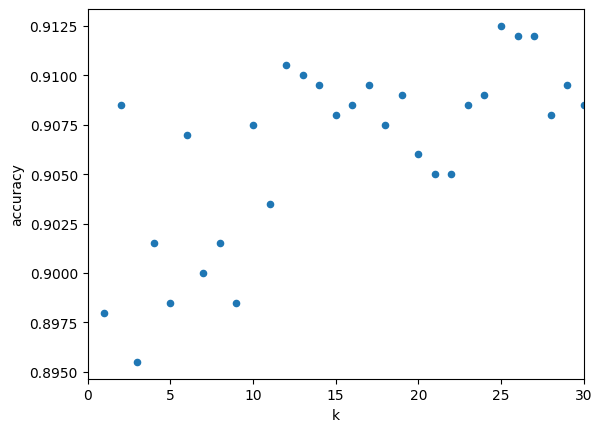

In [193]:
p = results.plot.scatter(x='k', y='accuracy', xlim=[0,30])


In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 43
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=43 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=43 is 0.9065


**Confusion Matrix**

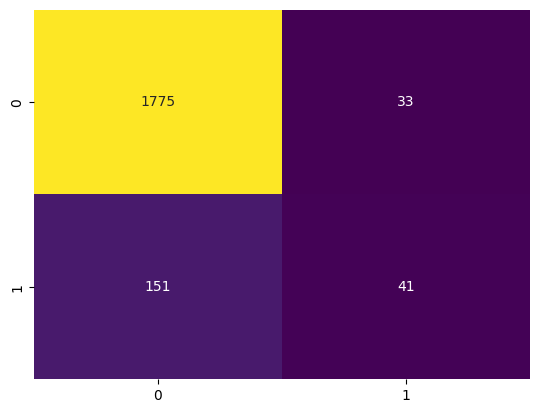

In [195]:
from sklearn.metrics import confusion_matrix
clf=KNeighborsClassifier(n_neighbors=35)
clf.fit(X_train,y_train)
predicted_value=clf.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws=
                           {"size":10},cbar=False,fmt='g',cmap="viridis")
plt.show()

**Splitting the data in training(50%), validation(30%),and test(20%) sets**

In [196]:
# Splitting the data in training(50%), validation(30%),and test(20%) sets
train_df, temp_df = train_test_split(Bank_Data, test_size=0.5, random_state=1)
valid_df, test_df = train_test_split(temp_df, test_size=0.4, random_state=1)
print('Training dataset', train_df.shape)
print('Validation dataset', valid_df.shape)
print('Test dataset', test_df.shape)


Training dataset (2500, 14)
Validation dataset (1500, 14)
Test dataset (1000, 14)


**Normalize data**

In [197]:
# Outcomes feature scaling and preprocessing
from sklearn import preprocessing
outcome = 'Personal Loan'
predictors = list(Bank_Data.columns)
predictors.remove(outcome)
Scaler = preprocessing.StandardScaler()
Scaler.fit(train_df[predictors])
train_x = Scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_x = Scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]
test_x = Scaler.transform(test_df[predictors])
test_y = test_df[outcome]


In [198]:
# fitting the data for the best K value (35)
classifier = KNeighborsClassifier(n_neighbors=35)
classifier.fit(train_x, train_y)


KNeighborsClassifier(n_neighbors=35)

In [199]:
#Confusion Matrix for training data
knnPredOpt = classifier.predict(train_x)
print(confusion_matrix(train_y, knnPredOpt))
print('Accuracy:', accuracy_score(train_y, knnPredOpt))

[[2257    2]
 [ 141  100]]
Accuracy: 0.9428


In [200]:
#Confusion Matrix for Validation Data
knnPredict = classifier.predict(valid_x)
print(confusion_matrix(valid_y, knnPredict))
print('Accuracy:', accuracy_score(valid_y, knnPredict))

[[1346    3]
 [ 105   46]]
Accuracy: 0.928


In [201]:
#Confusion Matrix for test Dataset
knnPredict = classifier.predict(test_x)
print(confusion_matrix(test_y, knnPredict))
print('Accuracy:', accuracy_score(test_y, knnPredict))

[[908   4]
 [ 57  31]]
Accuracy: 0.939


Change in accuracy can be observed in train,test and validation split. While comparing the test set with the validation set we can observe that test set results in better accuracy when compared to validation set While comparing the test set with the train set we can observe that the training set resulted with a better accuracy when compared to the test set.